In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import math

In [10]:
def solve_verlet(xidotfunc, t, xi0, dt):
    ixi = np.array(xi0)
    nslots = int((t[1]-t[0]) // dt) + 1
    rv = np.zeros(ixi.shape + (nslots,))
    rv[:,0] = ixi
    NDIM = int(ixi.shape[0]/2)
    for islot in range(nslots - 1):
        # note the time assignments are wrong but since H is time-invariant that's OK
        ixi[NDIM:] += xidotfunc(t[0]+dt*islot, ixi)[NDIM:]*dt/2
        ixi[:NDIM] += xidotfunc(t[0]+dt*(islot+1), ixi)[:NDIM]*dt
        ixi[NDIM:] += xidotfunc(t[0]+dt*(islot+1), ixi)[NDIM:]*dt/2
        rv[:,islot+1] = ixi
    return rv

def wrap(angle):
    return (angle + math.pi) % (2*math.pi) - math.pi

Simplified problem $H = \frac{1}{2}(p_1^2 + p_2^2) -\cos q_1 -\cos q_2 + \frac{1}{2}\epsilon(q_1-q_2)^2$

In [41]:
EPSILON=0.0
KX=1
KY=math.pi

def XH_HO(t, xi):
    # t is ignored; xi = [x, y, px, py]
    return np.array([xi[2], xi[3], -(np.sin(xi[0])+EPSILON*(xi[0]-xi[1])), -(np.sin(xi[1])+EPSILON*(xi[1]-xi[0]))])

In [545]:
DT = 0.01
soln=solve_verlet(XH_HO, [0,10000], [1.5, -1.5, 0, 1.58839], DT)

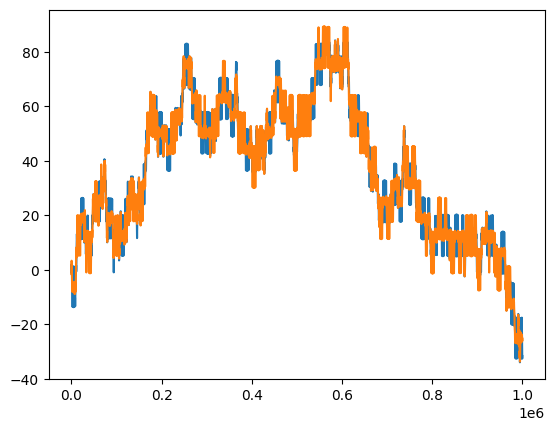

In [546]:
plt.plot(soln[0])
plt.plot(soln[1])
plt.show()

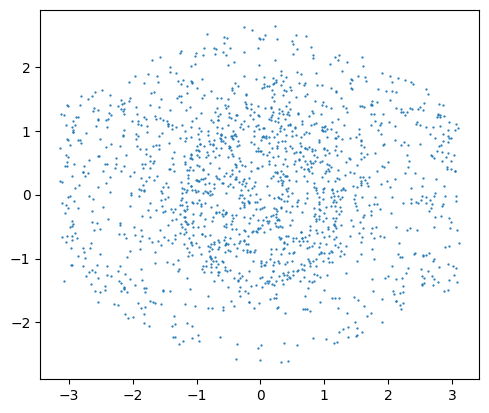

In [548]:
# construct Poincare section
sign_changes = np.diff(np.sign(np.sin(soln[0]))) > 0

fig, ax = plt.subplots()
ax.set_aspect('equal')
plt.plot((soln[1][:-1][sign_changes] + math.pi) % (2*math.pi) - math.pi, soln[3][:-1][sign_changes], 'o', ms=0.6)
plt.show()

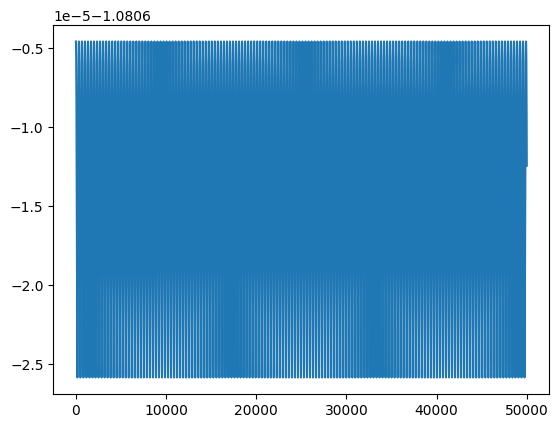

In [358]:
plt.plot(.5*(soln[2]**2+soln[3]**2)-np.cos(soln[0])-np.cos(soln[1])+.5*EPSILON*(soln[0]-soln[1])**2)
# plt.ylim(1.25,1.5)
plt.show()

In [79]:
EPSILON=0.00001
DT = 0.01
solns = {}
for qdot0 in np.linspace(0,2.5,20):
    solns[qdot0] = solve_verlet(XH_HO, [0,100], [0, -1.5, qdot0, 0.], DT)

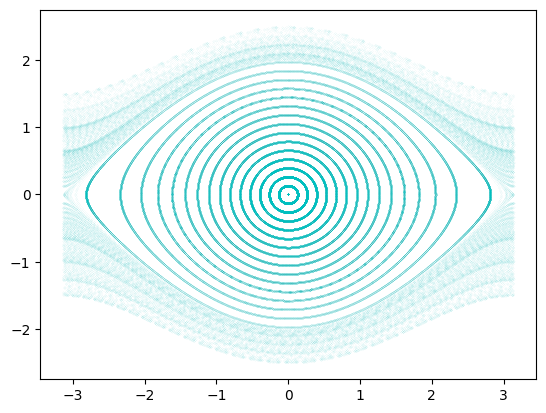

In [81]:
SKIP=10
for xi, _, xidot, _ in solns.values():
    plt.plot(wrap(xi)[::SKIP], xidot[::SKIP], '.', markersize=0.04, color='c')

plt.show()

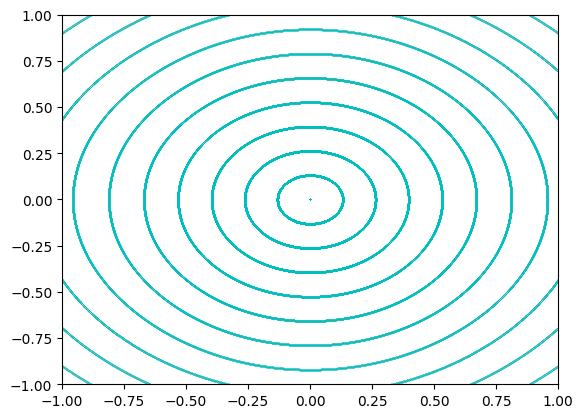

In [82]:
SKIP=2
for xi, _, xidot, _ in solns.values():
    plt.plot(wrap(xi)[::SKIP], xidot[::SKIP], '.', markersize=0.04, color='c')

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()

In [120]:
EPSILON=0.2
DT = 0.01
solns = {}
for qdot0 in np.linspace(0.45,0.5,15):
    solns[qdot0] = solve_verlet(XH_HO, [0,1000], [0, -1.5, qdot0, 0.], DT)

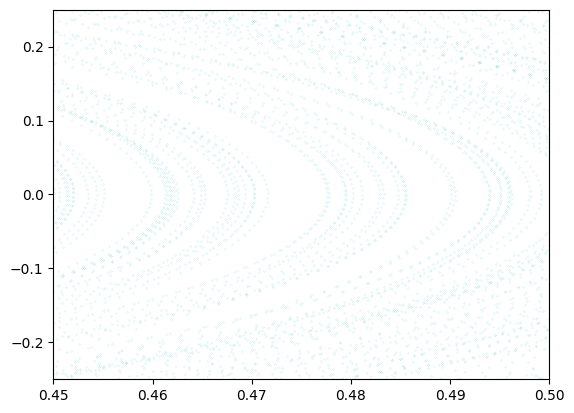

In [121]:
SKIP=1
for xi, _, xidot, _ in solns.values():
    plt.plot(wrap(xi)[::SKIP], xidot[::SKIP], '.', markersize=0.16, color='c')

plt.xlim(0.45, 0.5)
plt.ylim(-0.25, 0.25)
plt.show()